<IPython.core.display.Javascript object>


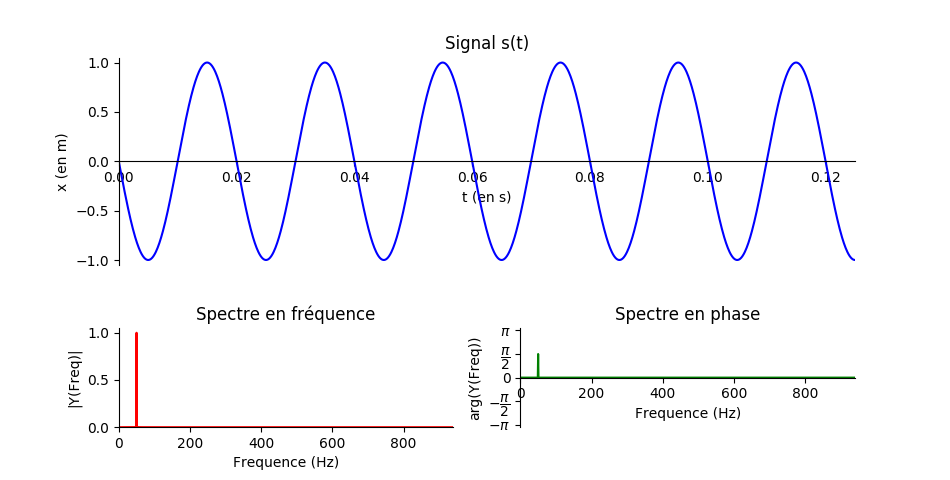

In [110]:
%matplotlib notebook
#En dynamique
from math import cos,pi,sin,atan2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import interact, widgets, HBox, Button, Checkbox,VBox, Layout
import matplotlib.gridspec as gridspec
from scipy import fft, arange
from numpy import sin, linspace, pi,angle

fig = plt.figure(figsize=(9.5,4.8))
gs = gridspec.GridSpec(7, 2)
ax1 = fig.add_subplot(gs[:4,:])
ax2 = fig.add_subplot(gs[5:,0])
ax3 = fig.add_subplot(gs[5:,1])
fig.show() 

t = [0.0001*i for i in range(10001)]



def f1(t,i):
    global A,f,d
    return A[i]*cos(2*pi*f[i]*t+d[i])
    
def trace():
    global t,act,A,f,d,ph
    xcos=[]
    x2=[]
    for val in t:
        temp = 0
        for i in range(9):
            temp += int(act[i])*f1(val,i)
        xcos.append(temp)
    
    ax1.clear()
    ax2.clear()
    ax3.clear()
      
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.spines['bottom'].set_position(('data',0))
    ax1.spines['left'].set_position(('data',0))
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')
    ax1.set_xlabel("t (en s)")
    ax1.set_ylabel("x (en m)")
    ax1.set_xlim([0,0.125])
    ax1.set_title("Signal s(t)")
    m = 1.05*max(1,max(xcos))
    ax1.set_ylim([-m,m])#[min(-0.025,li-1.05*xm),li+1.05*xm])
    #ax1.set_xticks([0,10,20])
    
    ax1.plot(t,xcos,"blue")
    #ax1.plot(t,xsin,"red",label="$B\sin(\omega t)$")
    #ax1.plot(t,xsomme,"green",label="$A\cos(\omega t)+B\sin(\omega t)$")
    
    n = len(xcos)
    k = arange(n)
    T = n/10001
    frq = k/T # two sides frequency range
    frq = frq[range(n//2)] # one side frequency range
    Y = fft(xcos)/(n//2) # fft computing and normalization
    Y = Y[range(n//2)]
    ax2.spines['right'].set_color('none')
    ax2.spines['top'].set_color('none')
    ax2.spines['bottom'].set_position(('data',0))
    ax2.spines['left'].set_position(('data',0))
    ax2.xaxis.set_ticks_position('bottom')
    ax2.yaxis.set_ticks_position('left')
    ax2.set_xlabel("Frequence (Hz)")
    ax2.set_ylabel("|Y(Freq)|")
    ax2.set_xlim([0,940])
    ax2.set_title("Spectre en fréquence")
    ax2.set_ylim([0,1.05*max(0.05,max(abs(Y)))])#[min(-0.025,li-1.05*xm),li+1.05*xm])
   # ax2.set_xticks([0,10,20])
    ax2.plot(frq,abs(Y),'r')
    #ax2.plot(t,x2,"green",label="$C\cos(\omega t + \phi)$")
    #ax2.legend(framealpha=1.)
    ph = [0 for i in range(len(frq))]
    
    for i in range(9):
        if act[i]:
            ph[f[i]]=d[i]
    ax3.spines['right'].set_color('none')
    ax3.spines['top'].set_color('none')
    ax3.spines['bottom'].set_position(('data',0))
    ax3.spines['left'].set_position(('data',0))
    ax3.xaxis.set_ticks_position('bottom')
    ax3.yaxis.set_ticks_position('left')
    ax3.set_xlabel("Frequence (Hz)")
    ax3.set_ylabel("arg(Y(Freq))")
    ax3.set_xlim([0,940])
    ax3.set_title("Spectre en phase")
    ax3.set_ylim([-pi*1.05,1.05*pi])#[min(-0.025,li-1.05*xm),li+1.05*xm])
    ax3.set_yticks([-pi,-pi/2,0,pi/2,pi])
    ax3.set_yticklabels(["$-\pi$","$-\dfrac{\pi}{2}$","0","$\dfrac{\pi}{2}$","$\pi$"])
    ax3.plot(frq,ph,'g')
  
start = Button(description="CALCULER")
boutinit = Button(description='INIT')
trig = Button(description="TRIANGLE")
rect = Button(description = "RECTANGLE")
actifs = [widgets.ToggleButton(
    value=True,
    description='',
    disabled=False,
    button_style='',
    tooltip='Description',
    icon='check',layout = Layout(width='3%',
                    display='flex')
)] + [widgets.ToggleButton(
    value=False,
    description='',
    disabled=False,
    button_style='', 
    tooltip='Description',
    icon='check',layout = Layout(width='3%',
                    display='flex')
) for i in range(8)]
    
    

actifs_ligne=HBox(actifs)
freq = [widgets.IntSlider(
    value=100,
    min=50,
    max=900,
    step=50,
    description='$f_{}$'.format(i),
    disabled=False,
    continuous_update=False,
    orientation='horizontal', layout = Layout(width='32%',
                    display='flex')) for i in range(1,10)]
ampl = [widgets.FloatSlider(
    value=1.,
    min=0.01,
    max= 1,
    step=0.01,
    description='$A_{}$'.format(i),
    disabled=False,
    continuous_update=False,
    orientation='horizontal', layout = Layout(width='40%',
                    display='flex')) for i in range(1,10)]
phi = [widgets.FloatSlider(
    value=0.,
    min=-pi,
    max= pi,
    step=pi/4,
    description='$\phi_{}$'.format(i),
    disabled=False,
    continuous_update=False,
    orientation='horizontal', layout = Layout(width='25%',
                    display='flex')) for i in range(1,10)]
h = []
for i in range(9):
    temp=[actifs[i],ampl[i],freq[i],phi[i]]
    h.append(HBox(temp, layout = Layout(display='flex',
                    align_items='stretch',
                    width='100%')))
ligne=VBox(h)

display(HBox([start,boutinit,trig,rect]))

display(ligne)

def setx0(b=None):
    global ampl,freq,phi,actifs,act,A,f,d
    A = [ampl[i].value for i in range(9)]
    act = [actifs[i].value for i in range(9)]
    f = [freq[i].value for i in range(9)]
    d = [phi[i].value for i in range(9)]

    trace()  
   
def raz(b=None):
    global ampl,freq,phi,actifs,act,A,f,d
    for i in range(9):
        ampl[i].value = 1.0
        actifs[i].value=False
        freq[i].value=100
        phi[i].value=0.
    actifs[0].value=True
    setx0()
    
def settrig(b=None):
    global ampl,freq,phi,actifs,act,A,f,d
    for i in range(9):
        ampl[i].value=1/(2*i+1)**2
        freq[i].value=(2*i+1)*50
        phi[i].value = (-1)**i*(-pi/2)
        actifs[i].value=True
    setx0()
    
    
def setrect(b=None):
    global ampl,freq,phi,actifs,act,A,f,d
    for i in range(9):
        ampl[i].value=1/(2*i+1)
        freq[i].value=(2*i+1)*50
        phi[i].value = -pi/2
        actifs[i].value=True
    setx0()
    

start.on_click(setx0)
boutinit.on_click(raz)
trig.on_click(settrig)
rect.on_click(setrect)
for i in range(9):
    ampl[i].observe(setx0, names='value')
    actifs[i].observe(setx0, names='value')
    freq[i].observe(setx0, names='value')
    phi[i].observe(setx0, names='value')
setx0()